In [2]:
# !pip install geopandas folium matplotlib seaborn scipy
# !pip install esda
# !pip install splot
# # for google colab, had to reinstall some pacakges.

### Introduction

In this notebook, we use the merged_df that has the top 19 buildings that have the most evictions as our main dataset and visualize it with Folium. 

In [ ]:
# !pip install geopandas folium matplotlib seaborn scipy esda splot

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import datetime as dt
import scipy

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# visualization
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium import Marker
from folium.plugins import MarkerCluster
import plotly.express as px
import plotly.io as pio

# spatial statistics
from esda.moran import Moran
from esda import Moran_Local
from esda.getisord import G_Local
from shapely.geometry import Point
from libpysal.weights import Queen, Rook

# system and utility
import warnings
import os
import io
from IPython.display import IFrame
from google.colab import files

from libpysal.weights import Queen, Rook
from esda.moran import Moran
import matplotlib.pyplot as plt
from splot.esda import moran_scatterplot

# suppress warnings
warnings.filterwarnings('ignore')

# inline
%matplotlib inline

# Part 1: Get the Evictions data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# data source:
# gdf already cleaned with lisa info
file_path = '/content/drive/My Drive/X999/top_evictions_bbl_merged_df.csv'

In [12]:
evictions_cleaned_raw = pd.read_csv(file_path)

In [13]:
evictions_cleaned = evictions_cleaned_raw.copy()

In [14]:
evictions_cleaned.head(1) # only show one row to save space

,bbl,average_year_eviction_count,borough,block,lot,community board,census tract 2010,ownername,ownertype,lotarea,...,assessland,assesstot,landuse,yearbuilt,latitude,longitude,zonedist1,zonedist2,postcode,nta
0,2028820229,36.285714,BX,2882,229,205.0,53.0,"RIVER PARK BRONX APARTMENTS, INC.",X,856800.0,...,11566800.0,55282050.0,4.0,1973.0,40.85187,-73.922649,M2-1,NaN,10453.0,University Heights-Morris Heights


In [16]:
merged_df = evictions_cleaned.copy()

# Part 4: Show the data on Folium map for better viz
- to visualize areas with higher eviction rates (top 20)

In [17]:
# heat map is kinda fuzzy to look at
# in the next cell, use markercluster

heat_data = [[row['latitude'], row['longitude']] for index, row in merged_df.iterrows()]
nyc_20_heat_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
# # HeatMap(heat_data).add_to(nyc_20_heat_map)

In [20]:
marker_cluster = MarkerCluster().add_to(nyc_20_heat_map)
for point in heat_data:
    folium.Marker(location=point).add_to(marker_cluster)

# nyc_20_heat_map

Saving bronx_closeup2.png to bronx_closeup2.png


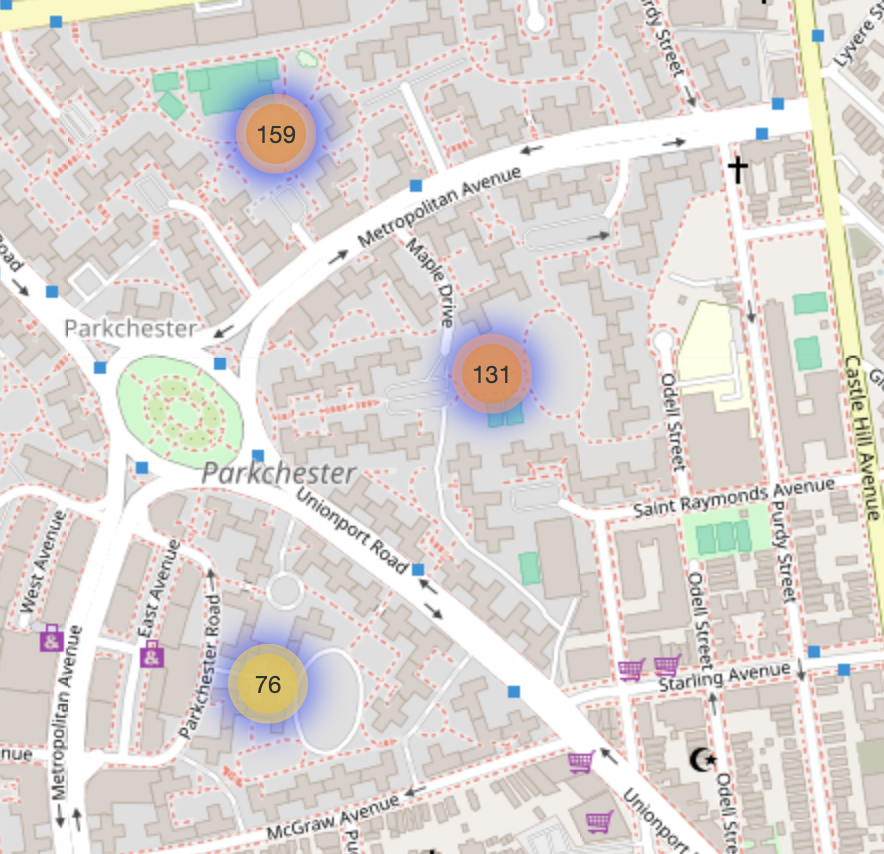

In [ ]:
# bronx heatmap uploads
# to save space, only show the screenshot here
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image(filename='bronx_closeup2.png') # have to rerun the image so it shows on github

Saving bronx_closeup1.png to bronx_closeup1.png


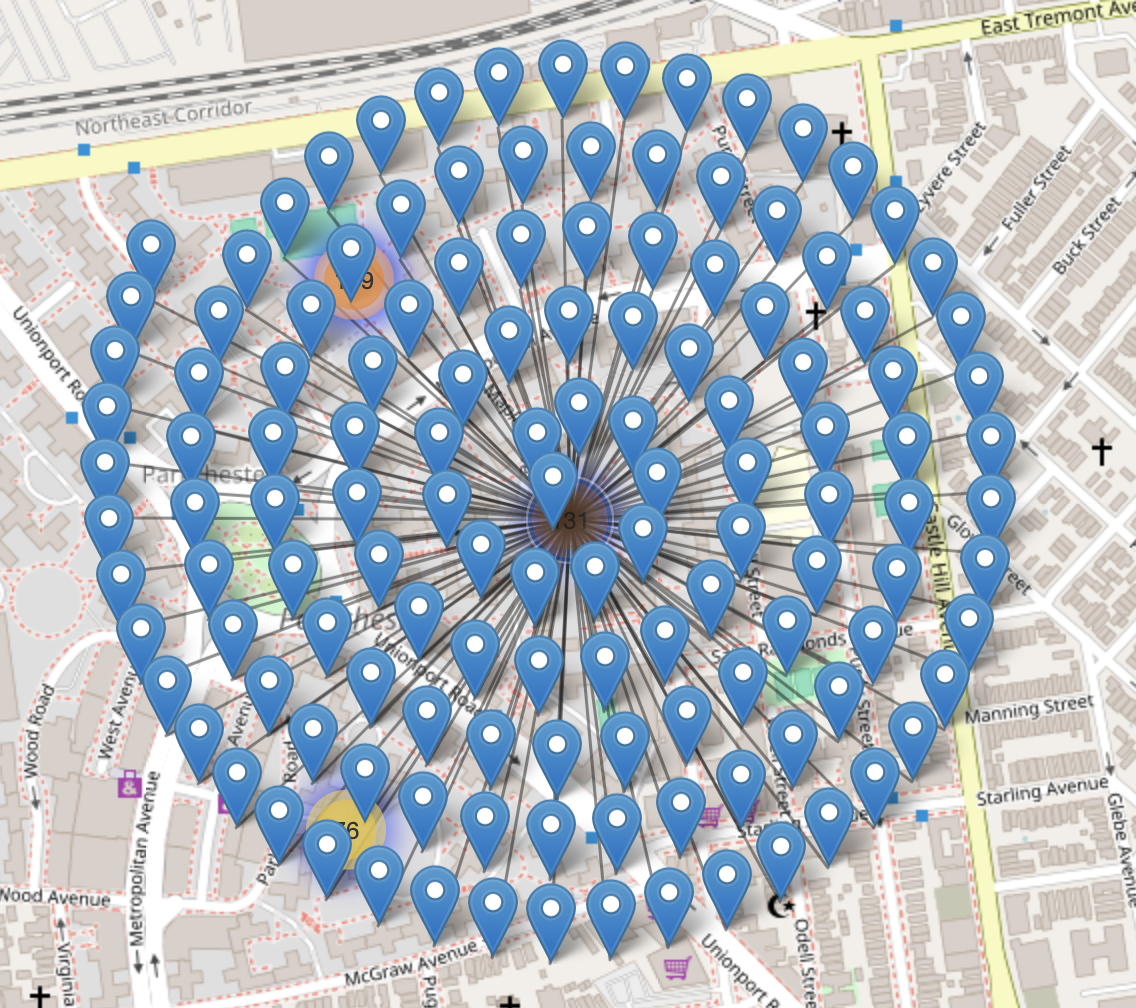

In [ ]:
# bronx heatmap uploads
# to save space, only show the screenshot here
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image(filename='bronx_closeup1.png') # have to rerun the image so it shows on github